<a href="https://colab.research.google.com/github/suriya-mouli/CNN_Model/blob/main/Real_and_fake_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Create folder structure first
!mkdir -p /content/data/shell /content/data/pebble /content/data/logs /content/models

In [ ]:
from posix import readlink
# Step 2: Upload SHELL images directly to shell folder
from google.colab import files
import shutil
import os

# Create folders safely
base_dir = '/content/data'
real_dir = os.path.join(base_dir, 'real')
fake_dir = os.path.join(base_dir, 'fake')

os.makedirs(real_dir, exist_ok=True)
os.makedirs(fake_dir, exist_ok=True)

print(" Directories ready:")
!find /content/data -type d

print(" Upload Fire images (select all images from your real folder)...")
real_uploaded = files.upload()

# Move all uploaded real images into the real folder
for filename in real_uploaded.keys():
    shutil.move(filename, os.path.join(real_dir, filename))

print(f" Uploaded {len(real_uploaded)} real.")


# Step 3: Upload fake images directly into fake folder
print(" Upload fake images (select all images from your fake folder)...")
fake_uploaded = files.upload()

# Move all uploaded non-fire images into the fake folder
for filename in fake_uploaded.keys():
    shutil.move(filename, os.path.join(fake_dir, filename))

print(f" Uploaded {len(fake_uploaded)} fake.")

# Step 4: Verify the upload
print("\n Final Folder Structure:")
!find /content/data -type d

print("\n Upload Summary:")
print(f" real_images: {len(os.listdir(real_dir))} files")
print(f" fake_images: {len(os.listdir(fake_dir))} files")
print(f" Logs folder: {len(os.listdir('/content/data/logs'))} files")

print("\n Ready for training!")
print(" Your images are stored in:")
print(f"   {real_dir}")
print(f"   {fake_dir}")

 Directories ready:
/content/data
/content/data/fake
/content/data/logs
/content/data/real
/content/data/pebble
/content/data/shell
 Upload Fire images (select all images from your real folder)...


Saving real_01074.jpg to real_01074.jpg
Saving real_01075.jpg to real_01075.jpg
Saving real_01076.jpg to real_01076.jpg
Saving real_01077.jpg to real_01077.jpg
Saving real_01078.jpg to real_01078.jpg
Saving real_01079.jpg to real_01079.jpg
Saving real_01080.jpg to real_01080.jpg
Saving real_01081.jpg to real_01081.jpg
Saving real_01059.jpg to real_01059.jpg
Saving real_01060.jpg to real_01060.jpg
Saving real_01061.jpg to real_01061.jpg
Saving real_01062.jpg to real_01062.jpg
Saving real_01063.jpg to real_01063.jpg
Saving real_01064.jpg to real_01064.jpg
Saving real_01065.jpg to real_01065.jpg
Saving real_01066.jpg to real_01066.jpg
Saving real_01067.jpg to real_01067.jpg
Saving real_01068.jpg to real_01068.jpg
Saving real_01069.jpg to real_01069.jpg
Saving real_01070.jpg to real_01070.jpg
Saving real_01071.jpg to real_01071.jpg
Saving real_01072.jpg to real_01072.jpg
Saving real_01073.jpg to real_01073.jpg
Saving real_01043.jpg to real_01043.jpg
Saving real_01044.jpg to real_01044.jpg


Saving mid_9_1110.jpg to mid_9_1110.jpg
Saving mid_94_1111.jpg to mid_94_1111.jpg
Saving mid_95_1100.jpg to mid_95_1100.jpg
Saving mid_96_1111.jpg to mid_96_1111.jpg
Saving mid_97_1111.jpg to mid_97_1111.jpg
Saving mid_98_1111.jpg to mid_98_1111.jpg
Saving mid_99_1100.jpg to mid_99_1100.jpg
Saving mid_7_1100.jpg to mid_7_1100.jpg
Saving mid_8_1111.jpg to mid_8_1111.jpg
Saving mid_78_1101.jpg to mid_78_1101.jpg
Saving mid_79_1111.jpg to mid_79_1111.jpg
Saving mid_80_1111.jpg to mid_80_1111.jpg
Saving mid_81_1101.jpg to mid_81_1101.jpg
Saving mid_82_1111.jpg to mid_82_1111.jpg
Saving mid_83_1111.jpg to mid_83_1111.jpg
Saving mid_84_1111.jpg to mid_84_1111.jpg
Saving mid_85_0011.jpg to mid_85_0011.jpg
Saving mid_86_1111.jpg to mid_86_1111.jpg
Saving mid_87_1111.jpg to mid_87_1111.jpg
Saving mid_88_1110.jpg to mid_88_1110.jpg
Saving mid_89_1111.jpg to mid_89_1111.jpg
Saving mid_90_1111.jpg to mid_90_1111.jpg
Saving mid_91_1111.jpg to mid_91_1111.jpg
Saving mid_92_1111.jpg to mid_92_1111.jp

In [ ]:
# Import required libraries

import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import imghdr
from google.colab import files
from PIL import Image
from tensorflow.keras import layers, models

# For dataset splitting
from sklearn.model_selection import train_test_split

In [ ]:
os.path.join('data', 'real')

'data/real'

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
len(gpus)

0

In [ ]:
import cv2
import imghdr

In [ ]:
# setting up path variable
data_dir = '/content/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(' Removing incompatible image: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print(' Issue with image {}, removing: {}'.format(image_path, e))
            os.remove(image_path)

In [ ]:
# STEP 1: Check current structure
print(" Current folder structure:")
!find /content/data -type d

# STEP 2: Remove extra folders (keep only real and fake)
import shutil
import os

folders_to_keep = ['real', 'fake']

for folder in os.listdir('/content/data'):
    folder_path = os.path.join('/content/data', folder)
    if os.path.isdir(folder_path) and folder not in folders_to_keep:
        shutil.rmtree(folder_path)
        print(f"Removed: {folder}")

# STEP 3: Reload dataset
import tensorflow as tf
import numpy as np

data = tf.keras.utils.image_dataset_from_directory(
    '/content/data',
    class_names=['real', 'fake'],
   image_size=(256, 256),
    batch_size=32
)

print(f"Classes: {data.class_names}")

# STEP 4: Verify labels
batch = data.as_numpy_iterator().next()
images, labels = batch
print(f" Label distribution in batch: {np.unique(labels, return_counts=True)}")


 Current folder structure:
/content/data
/content/data/fake
/content/data/logs
/content/data/real
/content/data/pebble
/content/data/shell
Removed: logs
Removed: pebble
Removed: shell
Found 203 files belonging to 2 classes.
Classes: ['real', 'fake']
 Label distribution in batch: (array([0, 1], dtype=int32), array([17, 15]))


In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
# accessig 'kera' 's predefined data pipeline function
# building our data pipeline
# Recreating the dataset after image cleaning to ensure only valid images are loaded
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 203 files belonging to 2 classes.


In [ ]:
# allowing to access our data pipeline
data_iterator = data.as_numpy_iterator()

In [ ]:
# accessing the dta pipeline itself
batch = data_iterator.next()

In [ ]:
# output : 2 (images, labels)
len(batch)

2

In [ ]:
# images represented by numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 1 - real
# class 2 - fake
batch[1]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

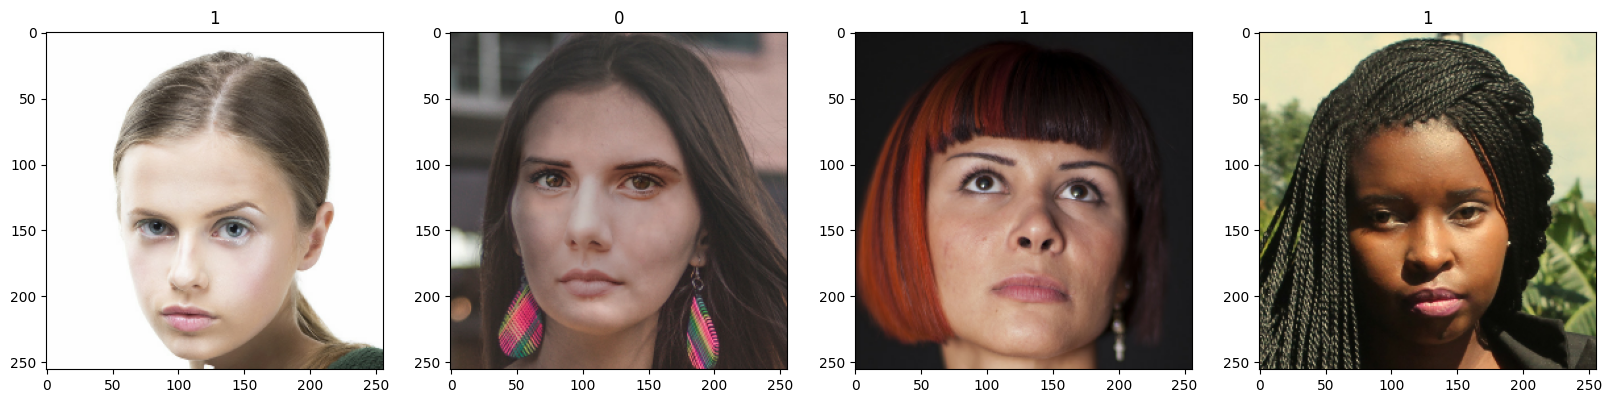

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# dividing by 255 to keep data between 0 & 1
scaled = batch[0] / 255

In [ ]:
# check purpose
scaled.max()

np.float32(1.0)

In [ ]:
# data.map -> allows transformation in pipeline
# x -> images (independent features, as in INPUT)
# y -> target variable
# no transformation on y
# go tf.data.dataset to explore more functions
data = data.map(lambda x,y: (x/255, y))

In [ ]:
# Get the iterator from the scaled dataset
scaled_iterator = data.as_numpy_iterator()

In [ ]:
# Get the next batch from the iterator
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

np.float32(0.0)

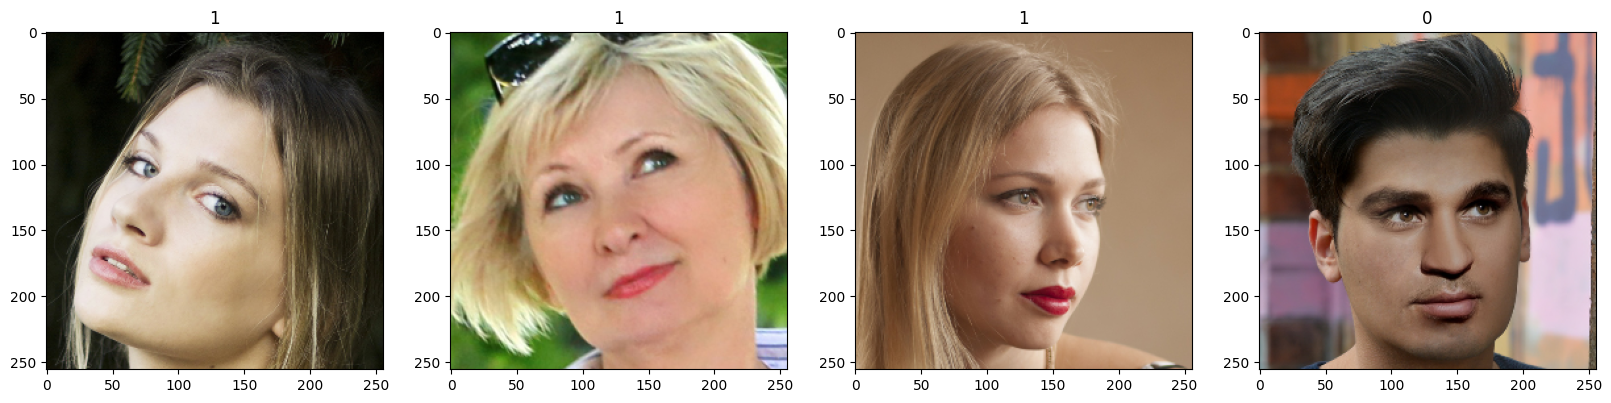

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    img_norm = img / 255.0   # Ensure values are in [0,1]
    ax[idx].imshow(img_norm)
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
len (data)

7

In [ ]:
train_size = int((len(data) * 0.7))   # 70% of 201 = 140.7 → 140
val_size = int((len(data) * 0.2))     # 20% of 201 = 40.2 → 40
test_size = len(data) - train_size - val_size  # Remaining = 21

print(f" Dataset Split Summary:")
print(f" Training set: {train_size} images")
print(f" Validation set: {val_size} images")
print(f" Test set: {test_size} images")

 Dataset Split Summary:
 Training set: 4 images
 Validation set: 1 images
 Test set: 2 images


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#DL Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Build the Sequential CNN model
model = models.Sequential([

    # Input layer + rescaling
    layers.Input(shape=(256, 256, 3)),   # Match your dataset image size
    layers.Rescaling(1./255),            # Normalize pixel values (0–1)

    # First convolution block
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #  Second convolution block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # 4️Third convolution block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dropout(0.4),                 # Reduce overfitting
    layers.Dense(128, activation='relu'),

    # Output layer
    layers.Dense(1, activation='sigmoid')  # Binary classification (fire or non-fire)
])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,870,721 (64.36 MB)

 Trainable params: 16,870,721 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers, metrics

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)

print(" Model compiled successfully and ready for training!")


 Model compiled successfully and ready for training!


In [ ]:
logdir='logs'

In [ ]:
# callback = to save the model at some perticular checkpoint
# This is for logout of the training model
# also to see back how well the model performed at some specific point
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# hist = history
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.4708 - loss: 0.7850 - precision: 0.3571 - recall: 0.1578 - val_accuracy: 0.7500 - val_loss: 0.5758 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.4948 - loss: 0.7269 - precision: 0.1333 - recall: 0.0063 - val_accuracy: 0.4062 - val_loss: 0.6963 - val_precision: 0.4062 - val_recall: 1.0000
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 8s/step - accuracy: 0.4802 - loss: 0.6951 - precision: 0.4729 - recall: 1.0000 - val_accuracy: 0.4688 - val_loss: 0.6953 - val_precision: 0.4688 - val_recall: 1.0000
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 10s/step - accuracy: 0.4802 - loss: 0.6920 - precision: 0.4802 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6890 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.4885 - loss: 0.6874 - precision: 0.4885 - recall: 1.0000 - val_accuracy: 0.5938 - val_loss: 0.6817 - val_

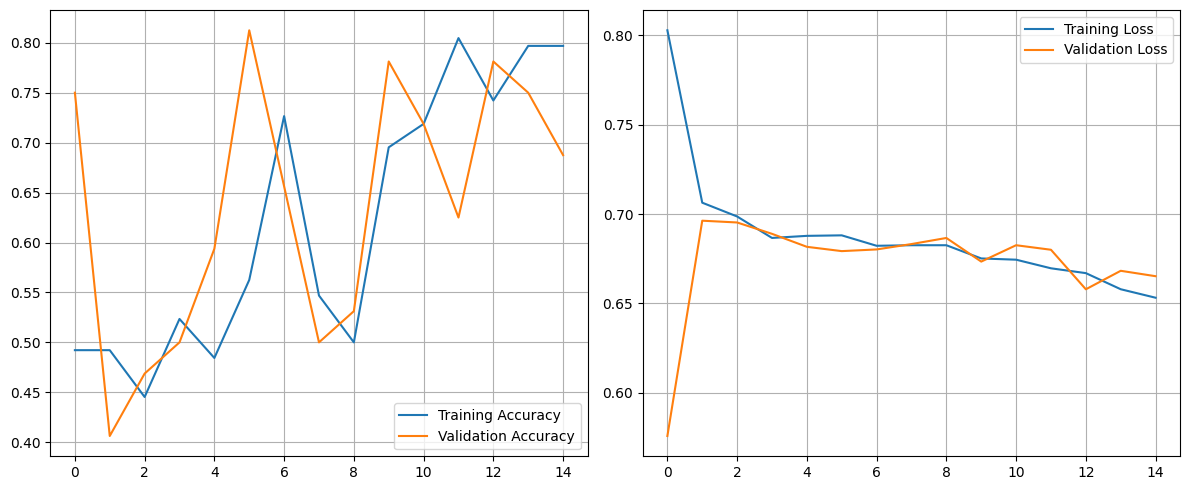

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)

#  Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model using the 'val' dataset
loss, acc, prec, rec = model.evaluate(val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7812 - loss: 0.6529 - precision: 0.7000 - recall: 0.6364
Validation Loss: 0.6529
Validation Accuracy: 0.7812


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.84615386, shape=(), dtype=float32) tf.Tensor(0.6111111, shape=(), dtype=float32) tf.Tensor(0.7906977, shape=(), dtype=float32)


In [ ]:
#Test

import cv2

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file picker


Saving fake_face.jpg to fake_face.jpg


In [ ]:
img_path = "/content/fake_face.jpg"

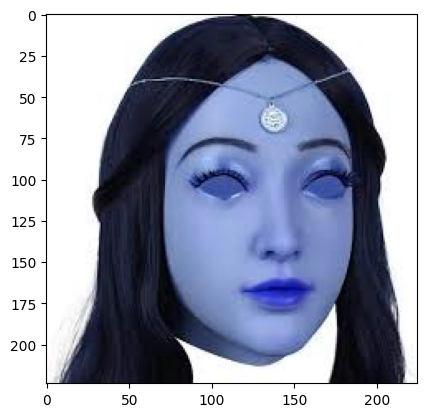

In [ ]:
img = cv2.imread("/content/fake_face.jpg")
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
# Preprocess image
img_tensor = tf.expand_dims(resize/255.0, axis=0)
yhat = model.predict(img_tensor)[0][0]
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


np.float32(0.49831212)

In [ ]:
# Print prediction in if-else format
if yhat > 0.5:
    print(f'Predicted class is real')
else:
    print(f'Predicted class is Fake')

Predicted class is Fake


In [ ]:
from tensorflow.keras.models import load_model
# h5 = serialization model format
model.save(os.path.join('models','realandfakefaceclassification.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'realandfakefaceclassification.h5'))

In [ ]:
new_model

<Sequential name=sequential, built=True>

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


array([[0.49831212]], dtype=float32)